# Chapter3. Classification

## Multiclass Classification
 - 알고리즘 for Multiclass Classification
   - Random Forest
   - Naive Bayes
 - Only Binary Classification 알고리즘 
  - SVM 
  - Linear Classifier
 - 하지만 다수의 binary classification algorithm을 활용하여 multiclass classification 문제를 다룰 수 있음
  - OvA (One-Versus-All) Strategy 
   > 예 0-9의 digit을 구분하는 classifier를 구현할 때 각각의 digit에 대한 binary classifier를 만들고 입력에 각 classifier의 최대 값을 이용해 판별하는 방식
    - 단점 : 각각의 classifier에 적절한 성능을 끌어올리기 위해 training data가 충분히 커야함
    - 장점 : class의 수만큼의 classifier 갯수가 필요함 (linear)
  - OvO (One-Versus-One) Strategy 
   > 위 digit classifier를 기준으로 예를 들면 1 v 2 / 1 v 3 / 1 v 4와 같이 각각의 class에 대한 binary classifier를 조합하는 형태 따라서 class의 개수가 N일 때 N x (N - 1) / 2 개의 binary classifier가 필요함. 장점은 **각각의 classifier가 단순해 지고 최적화에 유리하다는 점**
     
     - 장점 : 개별 Classifier는 적은양의 training data로도 충분한 성능을 얻을 수 있음
     - 단점 : class의 수에 따라 증가하는 classifier의 갯수가 (exponetial)

  - **OvA vs. OvO**
    - OvO : SVM과 같이 Training Data size 증가에 대해 성능 열화가 큰 경우 OvO가 선호 (Classifier 갯수를 늘리고 대신 input data를 줄이는 접근)
    - OvA : SVM과 같은 일부 케이스를 제외한 대부분의 binary classifier에서 선호되는 방식 
    
 


## Stratified split of input data into test & training set

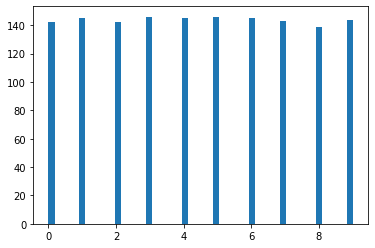

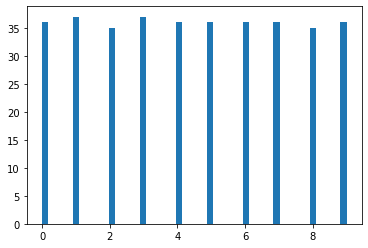

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt

digits = load_digits()
data_x = digits["data"]
data_y = digits["target"]

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=43)
for train_indices, test_indices in sss.split(data_x, data_y):
  test_input, test_labels = data_x[test_indices],data_y[test_indices]
  train_input, train_labels = data_x[train_indices], data_y[train_indices]


plt.hist(train_labels, bins=50)
plt.show()
plt.hist(test_labels, bins=50)
plt.show()



## Binary Classifier for Multi classification in *scikit-learn*
> scikit-learn은 binary classifier의 training 시 label의 class가 multiclass 일 경우 자동으로 OvA Strategy를 적용하도록 동작한다. 따라서 아래 예시에서 처럼 SDGClassifier에 parameter만 바꿔 줌으로써 binary classifier와 multiclass classifier로 사용 가능하다.

classes : [0 1 2 3 4 5 6 7 8 9]


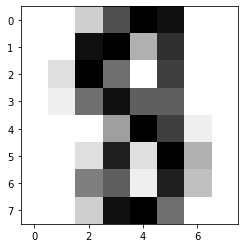

prediction : [8]


In [2]:
from sklearn.linear_model import SGDClassifier

from sklearn.multiclass import OneVsOneClassifier
import matplotlib
sgd_clf = SGDClassifier(random_state=43)

sgd_clf.fit(train_input, train_labels)
print("classes : {}".format(sgd_clf.classes_))

plt.imshow(train_input[10].reshape(8,8), cmap=matplotlib.cm.binary)
plt.show()

print("prediction : {}".format(sgd_clf.predict([train_input[10]])))



## Explicit choice of stratedy (OvO, OvA) 

In [3]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import SGDClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=43))
ovo_clf.fit(train_input, train_labels)

ovo_clf.predict([train_input[10]])


array([8])

## Evaluaion of classifier with cross_val_score

In [4]:
from sklearn.model_selection import cross_val_score

sgd_scores = cross_val_score(sgd_clf, train_input, train_labels, scoring="accuracy", cv=3)
ovo_scores = cross_val_score(ovo_clf, train_input, train_labels, scoring="accuracy", cv=3)
print("SDG scores : {}".format(sgd_scores))
print("OVO scores : {}".format(ovo_scores))

SDG scores : [0.95407098 0.93736952 0.94363257]
OVO scores : [0.94780793 0.9519833  0.96450939]


## Visualize errors

In [5]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predict = cross_val_predict(ovo_clf, train_input, train_labels, cv=3)
conf_mx = confusion_matrix(train_labels, predict)
conf_mx

array([[141,   0,   0,   0,   1,   0,   0,   0,   0,   0],
       [  0, 134,   0,   2,   3,   0,   2,   0,   3,   1],
       [  0,   1, 138,   0,   0,   0,   0,   0,   2,   1],
       [  0,   0,   0, 140,   0,   1,   0,   1,   2,   2],
       [  0,   0,   0,   0, 140,   0,   2,   0,   1,   2],
       [  0,   0,   0,   0,   1, 138,   1,   0,   2,   4],
       [  0,   4,   0,   0,   0,   1, 138,   0,   2,   0],
       [  0,   0,   0,   0,   2,   0,   0, 139,   1,   1],
       [  0,   3,   0,   0,   1,   1,   0,   3, 130,   1],
       [  0,   1,   0,   1,   0,   2,   0,   5,   1, 134]])

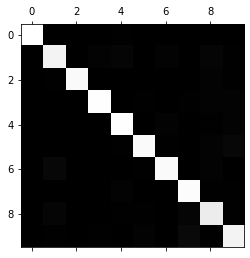

In [6]:
plt.matshow(conf_mx, cmap=matplotlib.cm.gray)
plt.show()

## Focusing on Errors

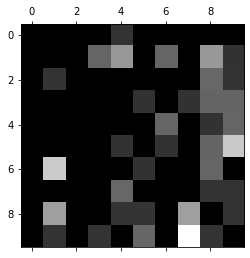

In [7]:
import numpy as np

rows_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / rows_sums
norm_conf_mx 

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=matplotlib.cm.gray)
plt.show()


## matplotlib 익숙해지기 (subplots)

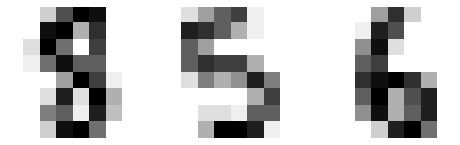

In [49]:
import math
def plot_digits(digits, images_per_row=1):
  digit_len = len(digits)
  if digit_len == 1:
    digit_len = 2
  fig, axis = plt.subplots(math.ceil(digit_len/ images_per_row), images_per_row, figsize=(8,8))
  dim = len(axis.shape)
  for idx, digit in enumerate(digits):
    isize = np.sqrt(len(digit))    
    res_digit = digit.reshape(int(isize),int(isize))
    if dim > 1:
      axis[math.floor(idx / images_per_row), idx % images_per_row].imshow(res_digit, cmap=matplotlib.cm.binary, interpolation="nearest")
      axis[math.floor(idx / images_per_row), idx % images_per_row].axis("off")
    else:
      axis[idx].imshow(res_digit, cmap=matplotlib.cm.binary, interpolation="nearest")    
      axis[idx].axis("off")
  remainder = (images_per_row - idx % images_per_row) - 1
  for i in range(0, remainder):
    idx += 1
    if dim > 1:
      axis[math.floor(idx / images_per_row), idx % images_per_row].axis("off")
    else:
      axis[idx].axis("off")
  plt.show()

plot_digits([train_input[10],train_input[11],train_input[12]], images_per_row=3)

## Confusion Matrix 상세 분석 
 - Confusion Matrix의 error 성분을 아래와 같이 추출하여 각 경우에 대하여 실제 입력 데이터를 비교해 보고 error가 발생된 원인을 찾아낼 수 있다.

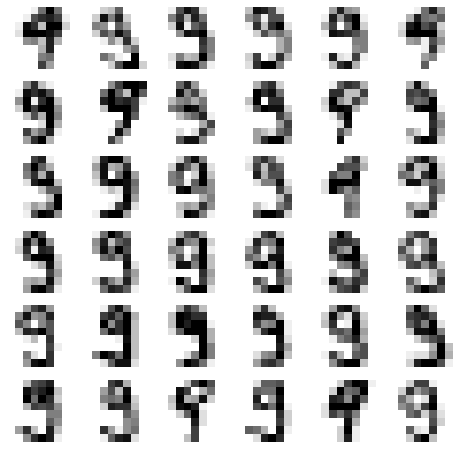

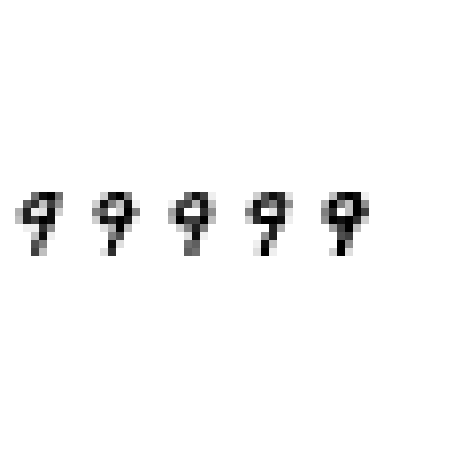

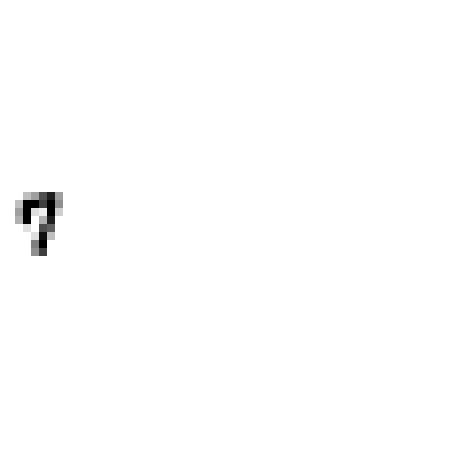

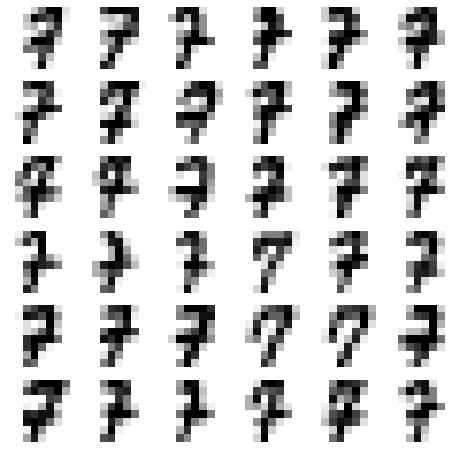

In [9]:
cl_a, cl_b = 9,7
x_aa = train_input[(train_labels == cl_a) & (predict == cl_a)]
x_ab = train_input[(train_labels == cl_a) & (predict == cl_b)]
x_ba = train_input[(train_labels == cl_b) & (predict == cl_a)]
x_bb = train_input[(train_labels == cl_b) & (predict == cl_b)]

plot_digits(x_aa[:36], images_per_row=6)
plot_digits(x_ab[:36], images_per_row=6)
plot_digits(x_ba[:36], images_per_row=6)
plot_digits(x_bb[:36], images_per_row=6)

## Multilabel Classification
> Input과 Label의 관계가 1:N인 경우 (예를 들어 위 MNIST의 Label이 숫자값과 짝수 / 홀수 판별이 주어질 경우)
 - 대표적인 예로 사진에서 여러 사람의 얼굴을 추출해 내는 경우 (입력된 사진 데이터에 대하여 다수의 class (사람의 이름 혹은 식별자 등))

In [10]:
from sklearn.neighbors import KNeighborsClassifier

train_large_value_labels = (train_labels >= 7)
train_odd_labels = (train_labels % 2 == 1)
multi_labels = np.c_[train_large_value_labels, train_odd_labels, train_labels]

knn_clf = KNeighborsClassifier()
knn_clf.fit(train_input, multi_labels)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Performance evaluation  of Mutlilabel classification (f1 score)


In [11]:
from sklearn.metrics import f1_score
knn_predicts = cross_val_predict(knn_clf, train_input, train_labels, cv=3)
print(knn_predicts)
f1_score(train_labels, knn_predicts, average="macro")

[7 0 7 ... 4 2 8]


0.9804629211755591

## Multioutput Classification
> multiple labels and multiple classes를 갖는 classification으로 마치 regression과 비슷한 느낌을 준다. 예시로 사용되는 Image의 Noise 제거의 경우 입력 이미지에 대해서 이미지를 prediction으로 내놓게 되는데, 이미지의 각 pixel별로 output label을 갖게되고 label의 종류는 pixel의 색상 값 (예시에서는 gray scale 0 ~ 255)을 갖는다. 



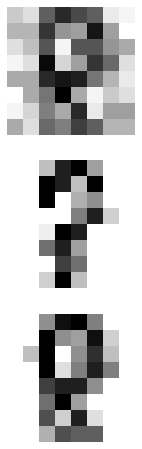

In [60]:
import numpy as np 
tidx = 5
noise = np.random.randint(0, 10, (len(train_input), 64))
train_input_mod = train_input + noise

knn_clf.fit(train_input_mod, train_input)
clean_digit = knn_clf.predict([train_input_mod[tidx]])
plot_digits([train_input_mod[tidx], clean_digit[0], train_input[tidx]], images_per_row=1)

## Excercise